# Acc 1 Stock Performance Tracker


## Setup


In [1]:
import contextlib
import pandas as pd
import draw_utils, process_utils, const


In [2]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)


In [3]:
acc_name = const.ACC1_NAME
user_name_l = const.ACC_USER_DICT[acc_name]
compare_index = const.VNI_NAME


## Prepare Dataframe


In [4]:
log_df, cf_df = process_utils.prepare_log_df_cf_df(
    acc_user_dict={
        acc_name_key: user_name_l
        for acc_name_key, user_name_l in const.ACC_USER_DICT.items()
        if acc_name_key == acc_name
    },
    acc_combined_name=None,
    index_name_l=[compare_index],
    index_combined_name=None,
)


In [5]:
user_df = process_utils.get_user_df(
    log_df,
    cf_df,
    acc_name=acc_name,
    user_name_l=user_name_l,
    index_name=compare_index,
)


## Charts


### NAV


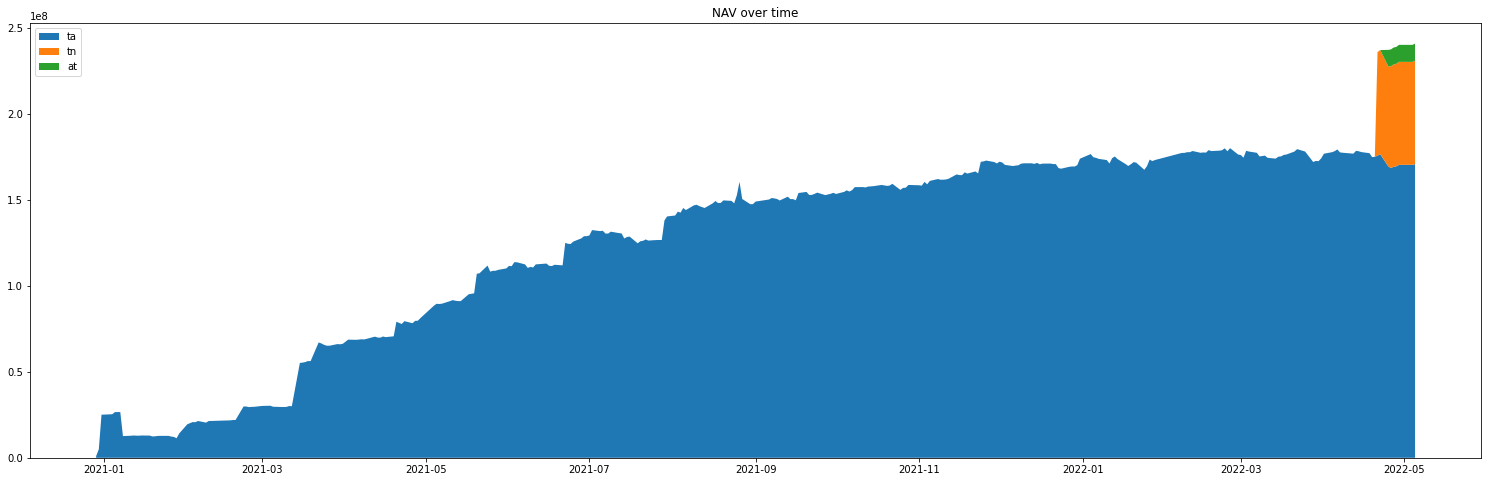

In [6]:
y_list = [user_df[user_name] for user_name in user_name_l]

draw_utils.plot_nav_stackplot(
    x=user_df.index,  # type: ignore
    y=y_list,
    labels=user_name_l,
)


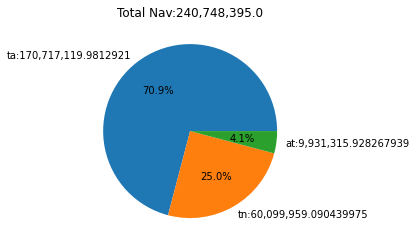

In [7]:
nav_l = [user_df[user_name].iloc[-1] for user_name in user_name_l]  # type: ignore
label_l = [f"{user_name}:{nav:,}" for user_name, nav in zip(user_name_l, nav_l)]
draw_utils.plot_nav_pie(nav_l, label_l=label_l)


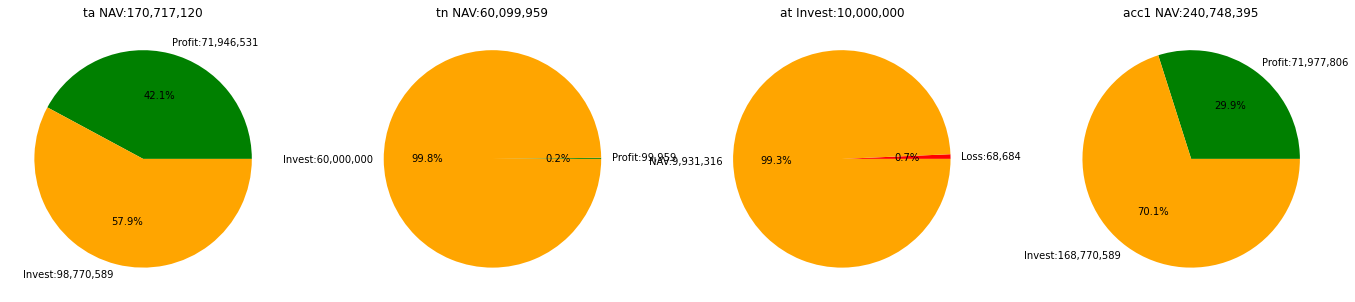

In [8]:
profit_invest_list: list[tuple[str, float, float]] = []
for name in user_name_l + [acc_name]:
    nav = user_df[name].iloc[-1]
    invest = -user_df[f"{name}_cf"].sum()
    profit = nav - invest
    profit_invest_list.append((name, profit, invest))
draw_utils.plot_profit_invest_pies(profit_invest_list)


### Recent


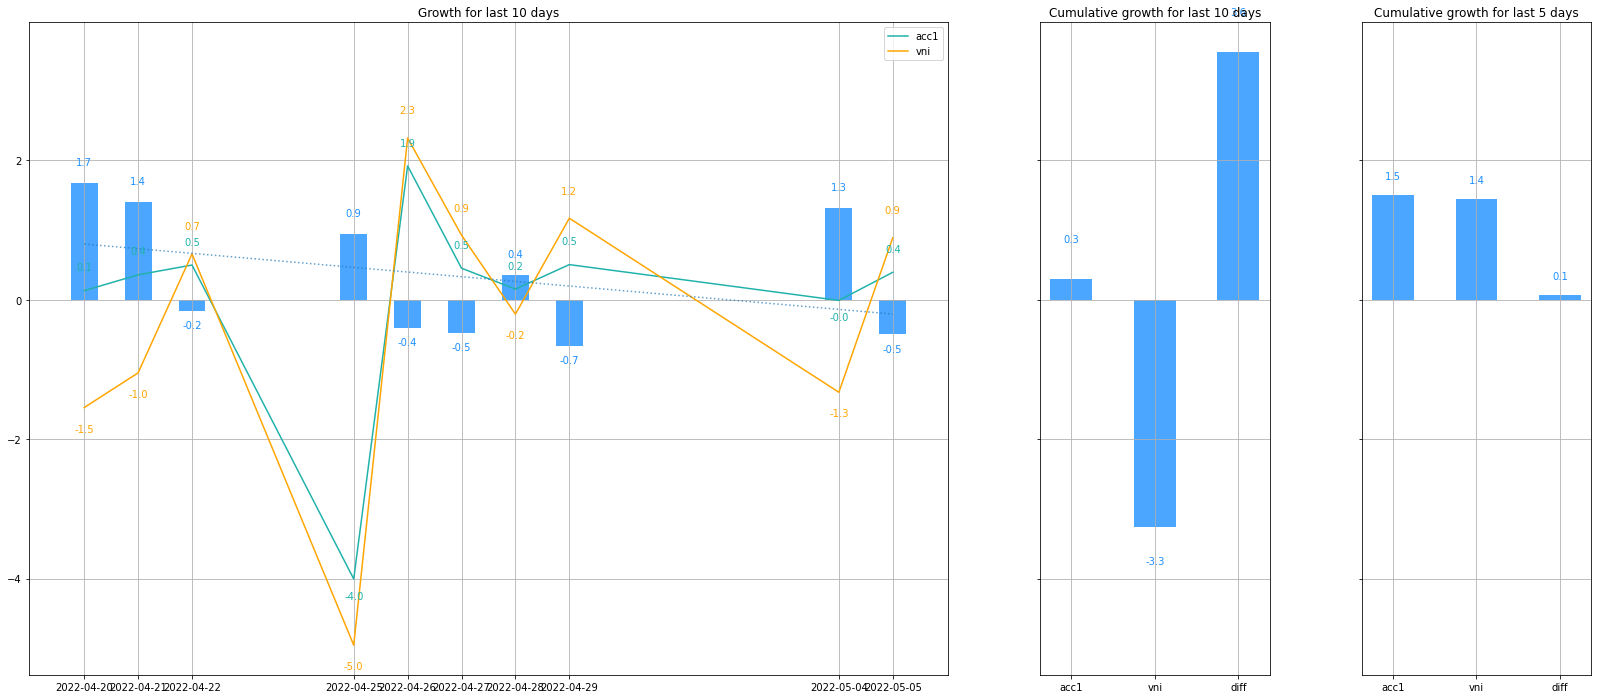

In [9]:
draw_utils.plot_recent_growth(
    user_df,
    num_days=10,
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
)


In [10]:
user_df.tail(10)


,vni,vni_diff,acc1,acc1_diff,ta_cf,tn_cf,at_cf,acc1_cf,day_start,ta_day_start,ta_share,ta_diff,ta,tn_day_start,tn_share,tn_diff,tn,at_day_start,at_share,at_diff,at,acc1_diff_p,acc1_aux_diff_p,ta_diff_p,ta_aux_diff_p,tn_diff_p,tn_aux_diff_p,at_diff_p,at_aux_diff_p,vni_diff_p,vni_aux_diff_p
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-04-20,1384.72,-21.73,174991558,229067.0,0.0,0.0,0.0,0.0,174762491.0,1.747625e+08,1.000000,2.290670e+05,1.749916e+08,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.001311,1.001311,0.001311,1.001311,NaN,NaN,NaN,NaN,-0.015450,0.984550
2022-04-21,1370.21,-14.51,235833911,842353.0,0.0,-60000000.0,0.0,-60000000.0,234991558.0,1.749916e+08,0.744672,6.272764e+05,1.756188e+08,6.000000e+07,0.255328,2.150766e+05,6.021508e+07,0.000000e+00,0.000000,0.000000,0.000000e+00,0.003585,1.003585,0.003585,1.003585,0.003585,1.003585,NaN,NaN,-0.010479,0.989521
2022-04-22,1379.23,9.02,237010938,1177027.0,0.0,0.0,0.0,0.0,235833911.0,1.756188e+08,0.744672,8.764987e+05,1.764953e+08,6.021508e+07,0.255328,3.005283e+05,6.051560e+07,0.000000e+00,0.000000,0.000000,0.000000e+00,0.004991,1.004991,0.004991,1.004991,0.004991,1.004991,NaN,NaN,0.006583,1.006583
2022-04-25,1310.92,-68.31,237122156,-9888782.0,0.0,0.0,-10000000.0,-10000000.0,247010938.0,1.764953e+08,0.714524,-7.065776e+06,1.694296e+08,6.051560e+07,0.244992,-2.422669e+06,5.809294e+07,1.000000e+07,0.040484,-400337.818239,9.599662e+06,-0.040034,0.959966,-0.040034,0.959966,-0.040034,0.959966,-0.040034,0.959966,-0.049528,0.950472
2022-04-26,1341.34,30.42,237396154,4473998.0,4200000.0,0.0,0.0,4200000.0,232922156.0,1.652296e+08,0.709377,3.173750e+06,1.684033e+08,5.809294e+07,0.249409,1.115856e+06,5.920879e+07,9.599662e+06,0.041214,184391.515773,9.784054e+06,0.019208,1.019208,0.019208,1.019208,0.019208,1.019208,0.019208,1.019208,0.023205,1.023205
2022-04-27,1353.77,12.43,238471350,1075196.0,0.0,0.0,0.0,0.0,237396154.0,1.684033e+08,0.709377,7.627190e+05,1.691660e+08,5.920879e+07,0.249409,2.681638e+05,5.947696e+07,9.784054e+06,0.041214,44313.166924,9.828367e+06,0.004529,1.004529,0.004529,1.004529,0.004529,1.004529,0.004529,1.004529,0.009267,1.009267
2022-04-28,1350.99,-2.78,238838028,366678.0,0.0,0.0,0.0,0.0,238471350.0,1.691660e+08,0.709377,2.601128e+05,1.694261e+08,5.947696e+07,0.249409,9.145288e+04,5.956841e+07,9.828367e+06,0.041214,15112.280386,9.843479e+06,0.001538,1.001538,0.001538,1.001538,0.001538,1.001538,0.001538,1.001538,-0.002054,0.997946
2022-04-29,1366.80,15.81,240043613,1205585.0,0.0,0.0,0.0,0.0,238838028.0,1.694261e+08,0.709377,8.552139e+05,1.702814e+08,5.956841e+07,0.249409,3.006840e+05,5.986909e+07,9.843479e+06,0.041214,49687.023897,9.893166e+06,0.005048,1.005048,0.005048,1.005048,0.005048,1.005048,0.005048,1.005048,0.011703,1.011703
2022-05-04,1348.68,-18.12,240022612,-21001.0,0.0,0.0,0.0,0.0,240043613.0,1.702814e+08,0.709377,-1.489762e+04,1.702665e+08,5.986909e+07,0.249409,-5.237843e+03,5.986386e+07,9.893166e+06,0.041214,-865.535975,9.892301e+06,-0.000087,0.999913,-0.000087,0.999913,-0.000087,0.999913,-0.000087,0.999913,-0.013257,0.986743


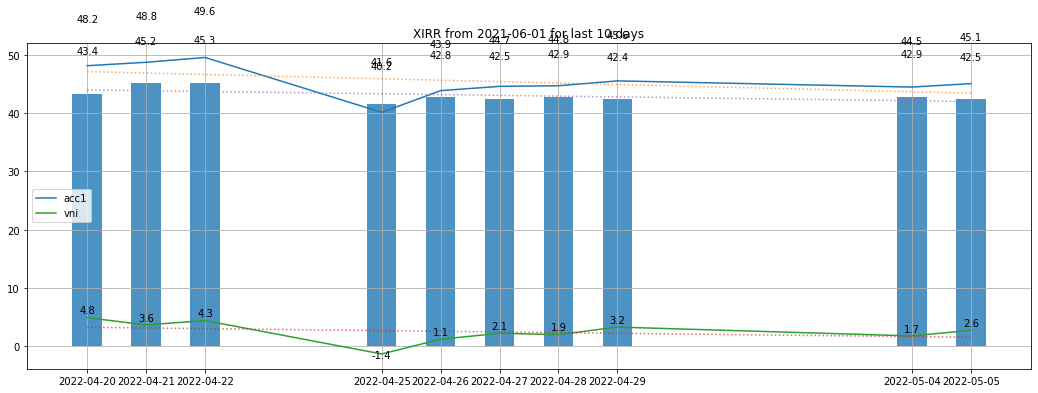

In [11]:
draw_utils.plot_recent_xirr(
    log_df=user_df,
    cf_df=cf_df,
    num_days=10,
    anchor_date="2021-06-01",
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
)


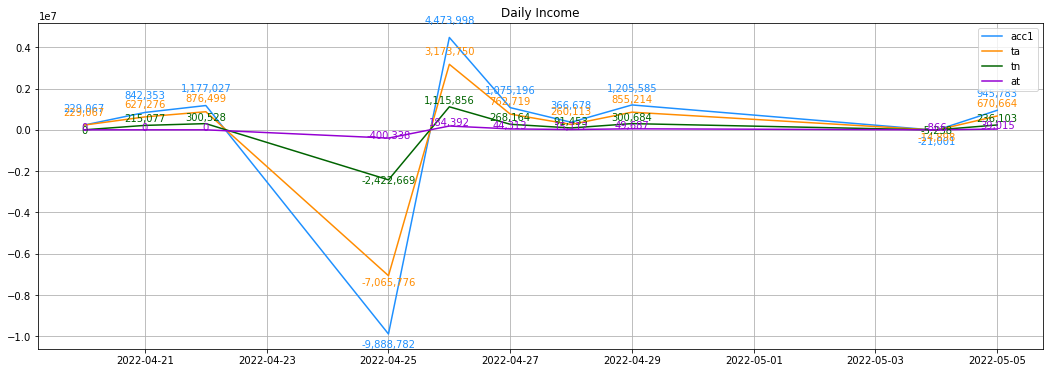

In [12]:
draw_utils.plot_recent_income(
    daily_df=user_df,
    num_days=10,
    name_l=[acc_name] + user_name_l,
)


### Diff distribution


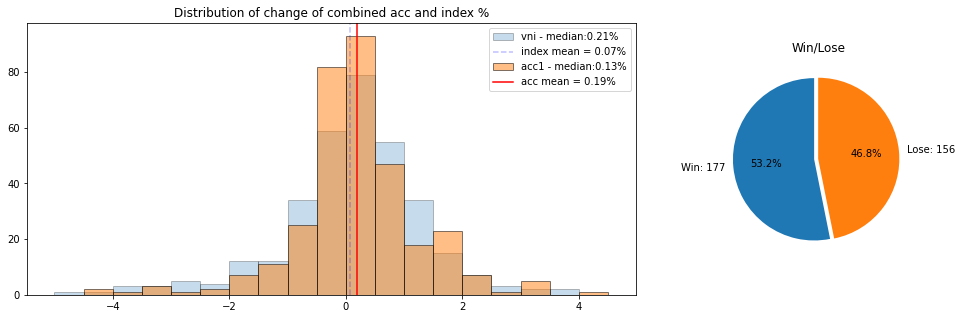

In [13]:
draw_utils.plot_daily_diff_p_distribution(
    user_df,
    acc_name=acc_name,
    index_name=compare_index,
)


### Growth XIRR


In [14]:
anchor_date = "2022-4-21"

growth_xirr_df = process_utils.get_overall_growth_xirr_df(
    user_df,
    cf_df,
    anchor_date=anchor_date,
    acc_name_l=[acc_name],
    index_name_l=[compare_index],
)


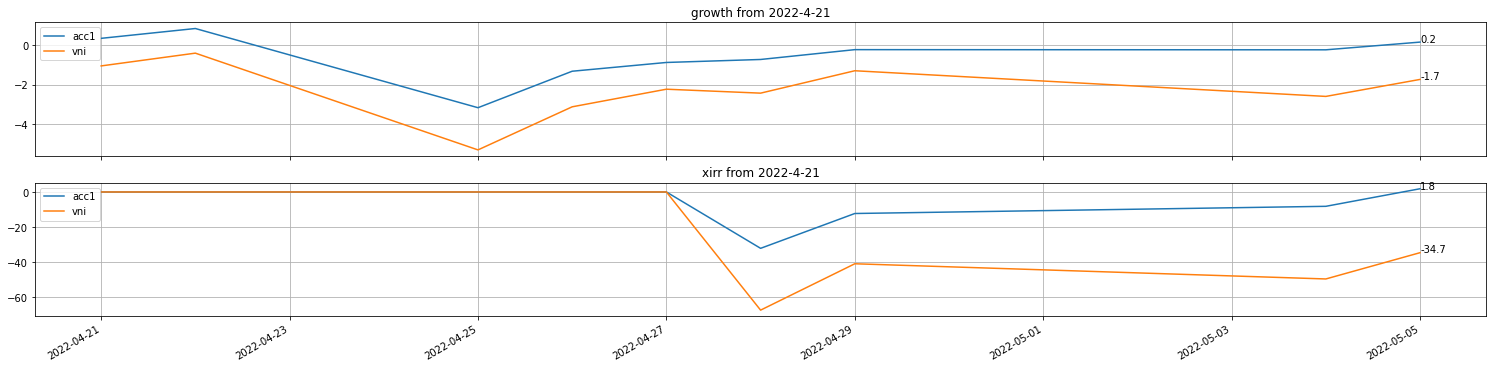

In [15]:
draw_utils.plot_growth_xirr_over_time(
    growth_xirr_df,
    anchor_date=anchor_date,
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
)


### Periodic


In [16]:
periodic_user_df = process_utils.add_period_cols(user_df)


#### Weekly


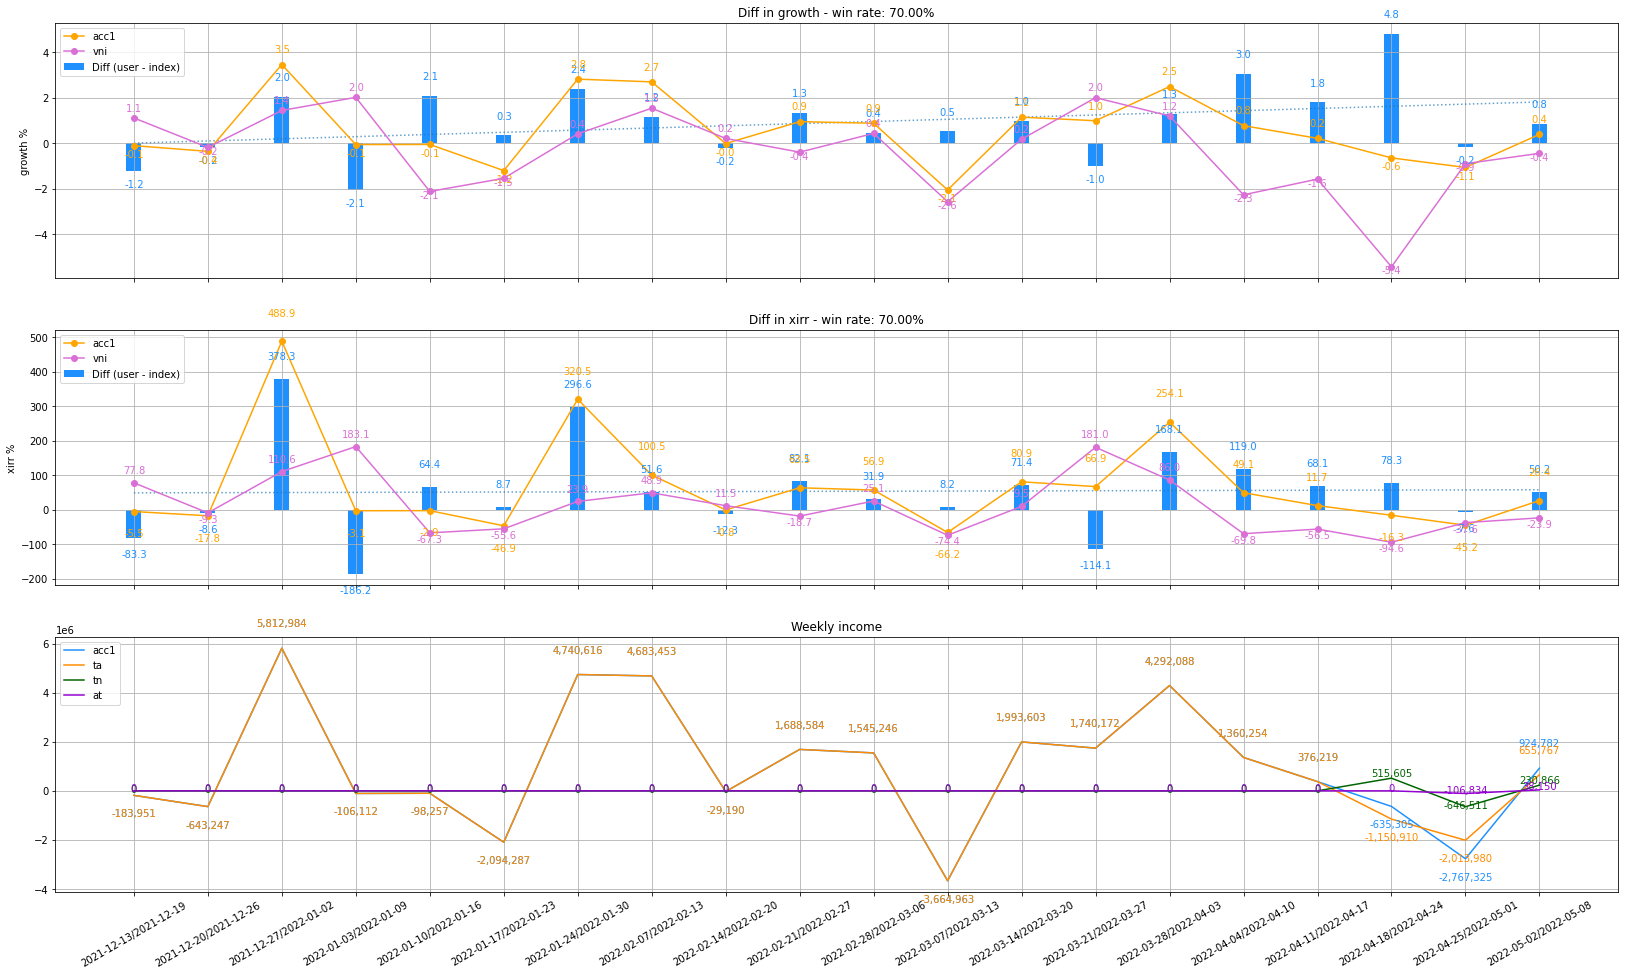

In [17]:
weekly_df = process_utils.get_period_df(
    period_symbol="W",
    df=periodic_user_df,
    cashflow_df=cf_df,
    all_acc_name_l=[acc_name] + user_name_l,
    index_name_combined_l=[compare_index],
)
# Not enough space to plot every week
weekly_df = process_utils.filter_latest_x_rows(df=weekly_df, row_num=20)  # type: ignore

draw_utils.plot_period_growth_xirr(
    growth_xirr_df=weekly_df,
    period_name="Weekly",
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
    income_acc_name_l=[acc_name] + user_name_l,
)


#### Monthly


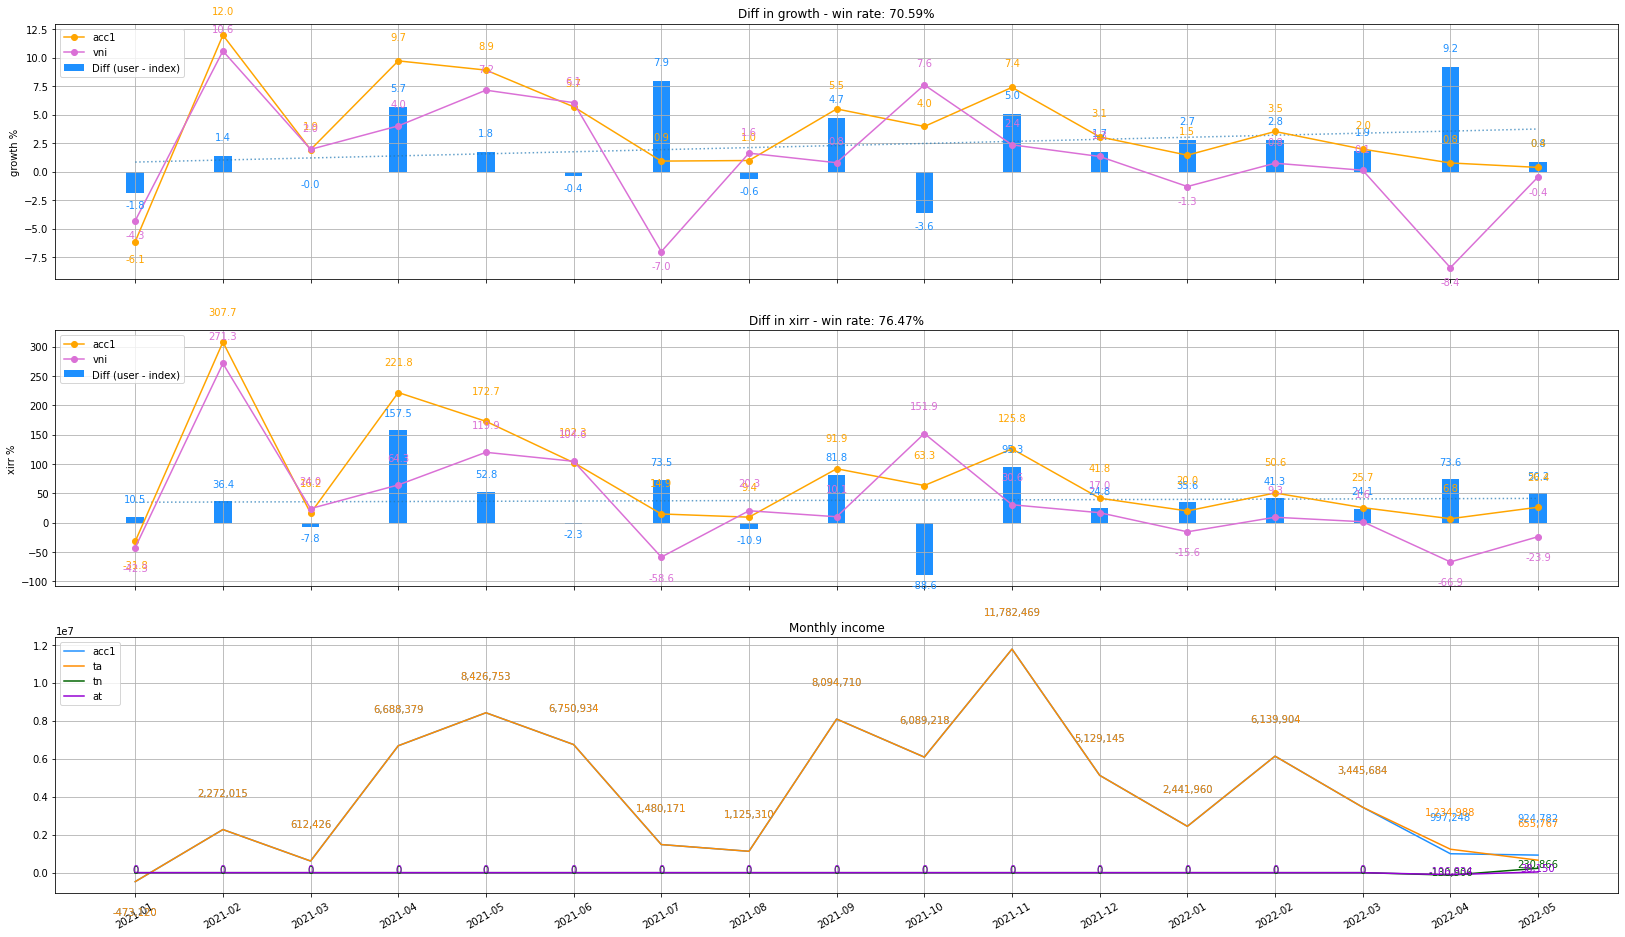

In [18]:
monthly_df = process_utils.get_period_df(
    period_symbol="M",
    df=periodic_user_df,
    cashflow_df=cf_df,
    all_acc_name_l=[acc_name] + user_name_l,
    index_name_combined_l=[compare_index],
)

with contextlib.suppress(KeyError):
    # Insufficient data for 2020-12
    monthly_df.drop(["2020-12"], inplace=True)

draw_utils.plot_period_growth_xirr(
    growth_xirr_df=monthly_df,
    period_name="Monthly",
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
    income_acc_name_l=[acc_name] + user_name_l,
)


#### Quarterly


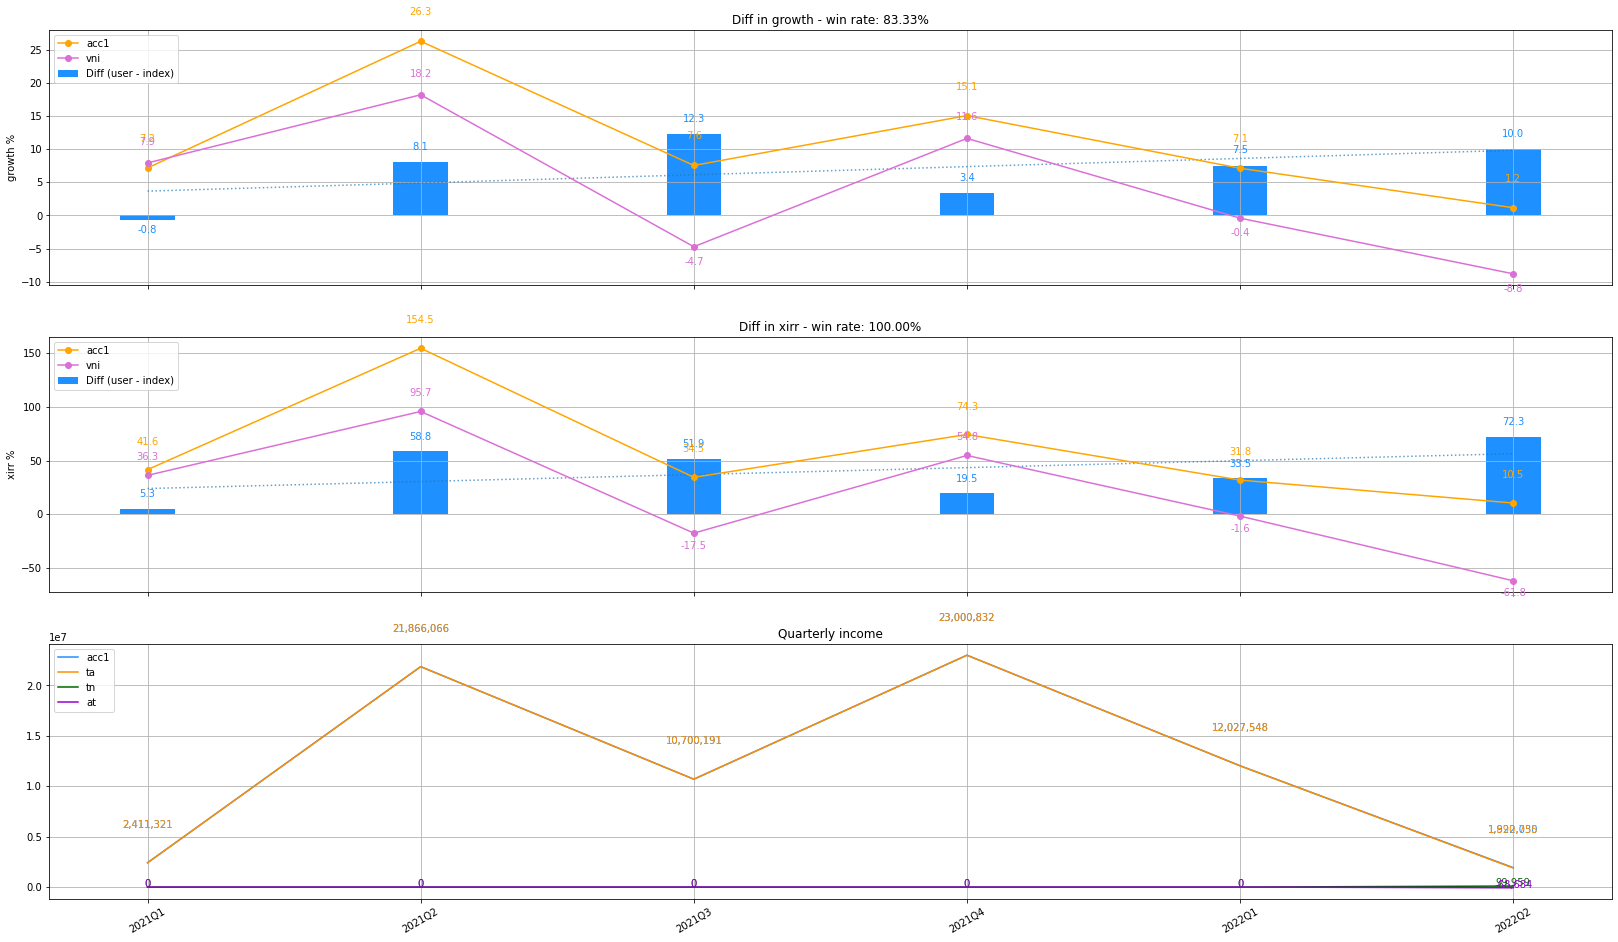

In [19]:
quaterly_df = process_utils.get_period_df(
    period_symbol="Q",
    df=periodic_user_df,
    cashflow_df=cf_df,
    all_acc_name_l=[acc_name] + user_name_l,
    index_name_combined_l=[compare_index],
)

with contextlib.suppress(KeyError):
    # Insufficient data for 2020Q4
    quaterly_df.drop(["2020Q4"], inplace=True)

draw_utils.plot_period_growth_xirr(
    growth_xirr_df=quaterly_df,
    period_name="Quarterly",
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
    income_acc_name_l=[acc_name] + user_name_l,
)


#### Yearly


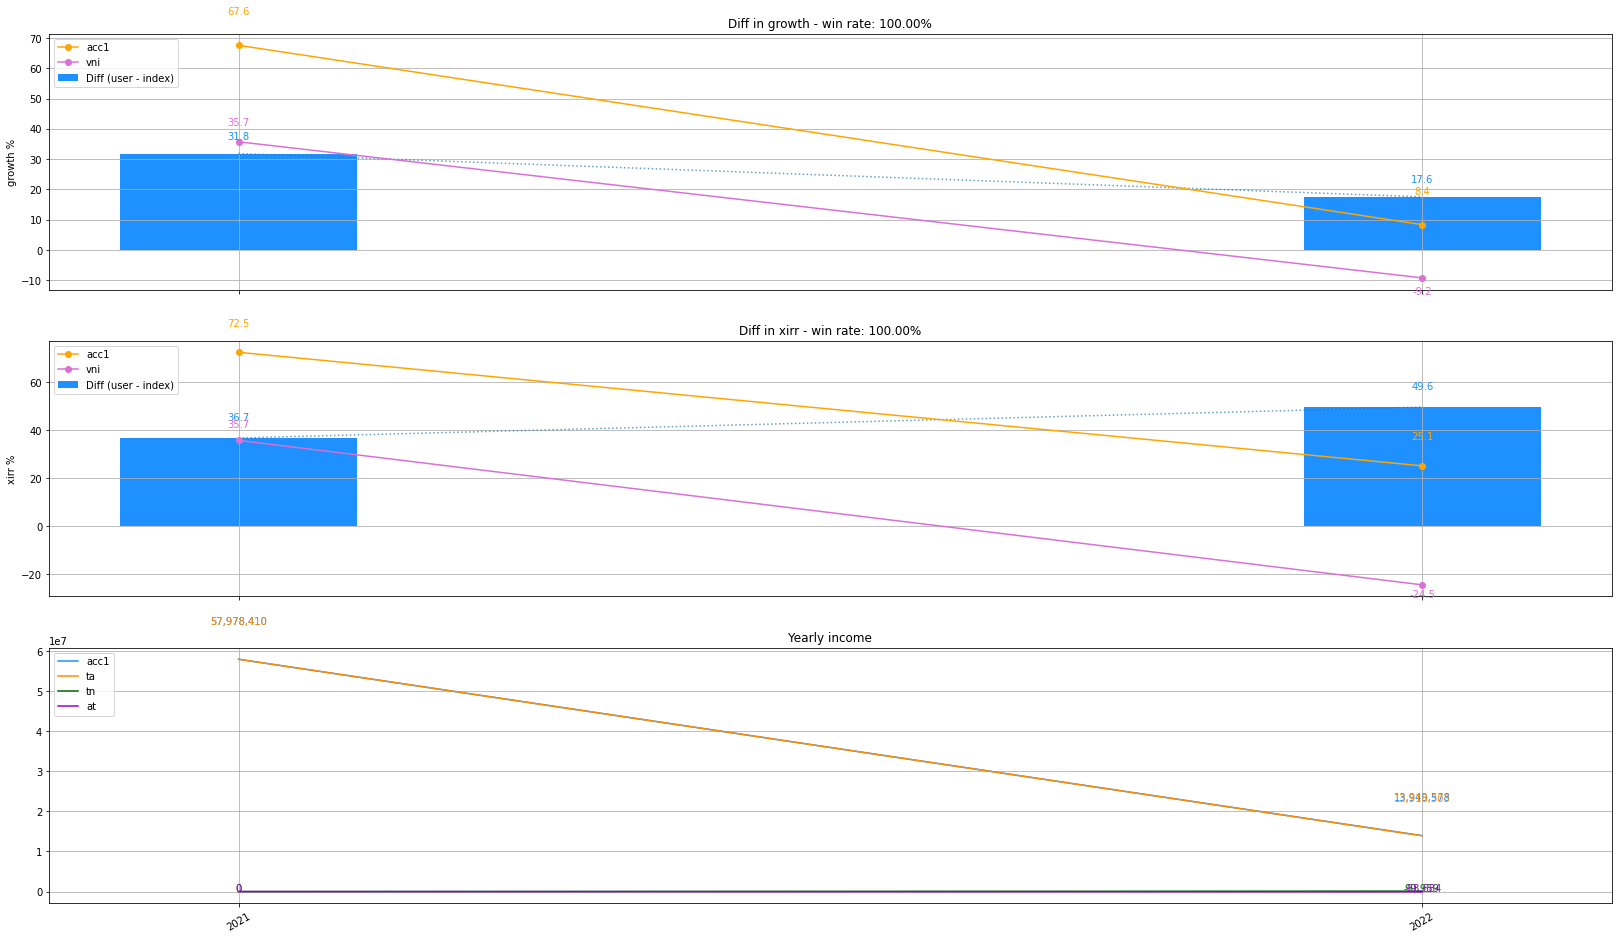

In [20]:
yearly_df = process_utils.get_period_df(
    period_symbol="Y",
    df=periodic_user_df,
    cashflow_df=cf_df,
    all_acc_name_l=[acc_name] + user_name_l,
    index_name_combined_l=[compare_index],
)

with contextlib.suppress(KeyError):
    # Insufficient data for 2020
    yearly_df.drop(["2020"], inplace=True)

draw_utils.plot_period_growth_xirr(
    growth_xirr_df=yearly_df,
    period_name="Yearly",
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
    income_acc_name_l=[acc_name] + user_name_l,
)


## Fee


In [25]:
processing_user_name = const.TN_USER_NAME
user_fee_p = const.USER_NAME_FEE_DICT[processing_user_name]
user_fee_anchor_date = const.USER_NAME_FEE_ANCHOR_DATE[processing_user_name]


In [26]:
user_df.tail()


,vni,vni_diff,acc1,acc1_diff,ta_cf,tn_cf,at_cf,acc1_cf,day_start,ta_day_start,ta_share,ta_diff,ta,tn_day_start,tn_share,tn_diff,tn,at_day_start,at_share,at_diff,at,acc1_diff_p,acc1_aux_diff_p,ta_diff_p,ta_aux_diff_p,tn_diff_p,tn_aux_diff_p,at_diff_p,at_aux_diff_p,vni_diff_p,vni_aux_diff_p
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-04-27,1353.77,12.43,238471350,1075196.0,0.0,0.0,0.0,0.0,237396154.0,1.684033e+08,0.709377,762719.022907,1.691660e+08,5.920879e+07,0.249409,268163.810169,5.947696e+07,9.784054e+06,0.041214,44313.166924,9.828367e+06,0.004529,1.004529,0.004529,1.004529,0.004529,1.004529,0.004529,1.004529,0.009267,1.009267
2022-04-28,1350.99,-2.78,238838028,366678.0,0.0,0.0,0.0,0.0,238471350.0,1.691660e+08,0.709377,260112.840711,1.694261e+08,5.947696e+07,0.249409,91452.878903,5.956841e+07,9.828367e+06,0.041214,15112.280386,9.843479e+06,0.001538,1.001538,0.001538,1.001538,0.001538,1.001538,0.001538,1.001538,-0.002054,0.997946
2022-04-29,1366.80,15.81,240043613,1205585.0,0.0,0.0,0.0,0.0,238838028.0,1.694261e+08,0.709377,855213.945393,1.702814e+08,5.956841e+07,0.249409,300684.030709,5.986909e+07,9.843479e+06,0.041214,49687.023897,9.893166e+06,0.005048,1.005048,0.005048,1.005048,0.005048,1.005048,0.005048,1.005048,0.011703,1.011703
2022-05-04,1348.68,-18.12,240022612,-21001.0,0.0,0.0,0.0,0.0,240043613.0,1.702814e+08,0.709377,-14897.620713,1.702665e+08,5.986909e+07,0.249409,-5237.843312,5.986386e+07,9.893166e+06,0.041214,-865.535975,9.892301e+06,-0.000087,0.999913,-0.000087,0.999913,-0.000087,0.999913,-0.000087,0.999913,-0.013257,0.986743
2022-05-05,1360.68,12.00,240748395,945783.0,220000.0,0.0,0.0,220000.0,239802612.0,1.700465e+08,0.709110,670664.283711,1.707171e+08,5.986386e+07,0.249638,236103.420787,6.009996e+07,9.892301e+06,0.041252,39015.295502,9.931316e+06,0.003944,1.003944,0.003944,1.003944,0.003944,1.003944,0.003944,1.003944,0.008898,1.008898


In [27]:
relevant_columns = [
    f"{compare_index}",
    f"{compare_index}_diff_p",
    processing_user_name,
    f"{processing_user_name}_day_start",
    f"{processing_user_name}_diff",
    f"{processing_user_name}_diff_p",
]

fee_df = user_df[relevant_columns]
fee_df = fee_df[fee_df.index >= user_fee_anchor_date]  # type: ignore


fee_df[f"{processing_user_name}_outperf_p"] = (
    fee_df[f"{processing_user_name}_diff_p"] - fee_df[f"{compare_index}_diff_p"]
)
fee_df[f"{processing_user_name}_outperf"] = (
    fee_df[f"{processing_user_name}_day_start"]
    * fee_df[f"{processing_user_name}_outperf_p"]
)
fee_df[f"{processing_user_name}_outperf_fee"] = (
    fee_df[f"{processing_user_name}_outperf"]
    * user_fee_p
)

fee_df.tail()


,vni,vni_diff_p,tn,tn_day_start,tn_diff,tn_diff_p,tn_outperf_p,tn_outperf,tn_outperf_fee
date,,,,,,,,,
2022-04-27,1353.77,0.009267,5.947696e+07,5.920879e+07,268163.810169,0.004529,-0.004738,-280515.342335,-28051.534233
2022-04-28,1350.99,-0.002054,5.956841e+07,5.947696e+07,91452.878903,0.001538,0.003591,213590.272520,21359.027252
2022-04-29,1366.80,0.011703,5.986909e+07,5.956841e+07,300684.030709,0.005048,-0.006655,-396417.024010,-39641.702401
2022-05-04,1348.68,-0.013257,5.986386e+07,5.986909e+07,-5237.843312,-0.000087,0.013170,788461.289301,78846.128930
2022-05-05,1360.68,0.008898,6.009996e+07,5.986386e+07,236103.420787,0.003944,-0.004954,-296540.548158,-29654.054816


In [29]:
print(f"{processing_user_name}")


cum_profit_df = fee_df[f"{processing_user_name}_diff"].sum()
print(f"\t Cummulative daily profit: \t{cum_profit_df:,.0f}")

cum_outperf = fee_df[f"{processing_user_name}_outperf"].sum()
print(f"\t Cummulative outperf. profit: \t{cum_outperf:,.0f}")

if cum_profit_df>0:
    cum_fee = fee_df[f"{processing_user_name}_outperf_fee"].sum()
    print(f"\t Cummulative outferf. fee: \t{cum_fee:,.0f}")


tn
	 Cummulative daily profit: 	99,959
	 Cummulative outperf. profit: 	1,118,843
	 Cummulative outferf. fee: 	111,884
